# Artificial Neural Network (ANN) — (MLP Backpropagation Time Series Forecasting Oscillator Movement)

Multi Layer Perceptron (MLP)

Multi layer perceptron adalah sebuah perceptron dengan dua atau lebih trainable weight layer. Pada SLP dapat membagi input space dengan sebuah hyperlane sedangkan MLP dapat mengklasifikasi convex polygon dari proses hyperlane dengan mengenali pattern yang terletak di atas hyperlane. MLP merupakan representasi dari fungsi pendekatan universal. Sebuah n-layer perceptron adalah n-variable weight layer dan n+1 neuron layer dengan neuron layer 1 sebagai input layer. Ilustrasi dari MLP dapat dilihat pada gambar.

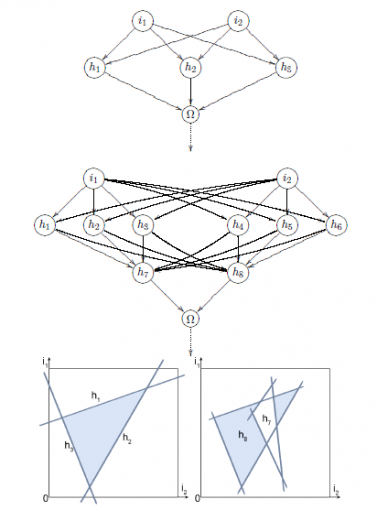

Penanganan fungsi error pada MLP menggunakan backpropagation error, yang dapat diaplikasikan pada multi  perceptron dengan fungsi aktivasi semi linear. Walaupun fungsi binary threshold dan fungsi yang lain tidak lagi mendukung tetapi kita bisa menggunakan fungsi Fermi atau hyperbolic tangent. Backpropagation adalah prosedur gradient dengan fungsi error Err(W) menerima semua n-weight sebagai argument dan menugaskannya sebagai output error  n dimensional.  Ilustrasi fungsi error yang digunakan ditunjukkan oleh gambar.

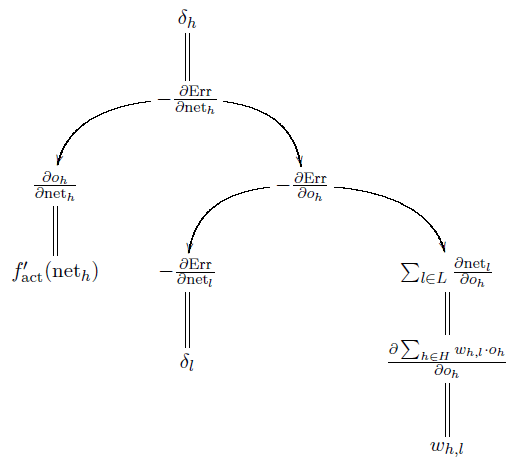

Setelah dilakukan pembuktian persamaan yang fungsi yang dihasilkan :

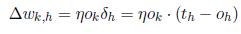

# Multi Layer Perceptron Algorithm — Training Model
Paling tidak ada tiga tahap untuk proses Training Model MLP, diantaranya.

1. Forward Pass
Pada tahap ini, kita hanya meneruskan input kedalam model dan mengalikannya dengan bobot (w) dan menambahkan bias (b) pada setiap layer sehingga pada akhirnya dapat digunakan untuk menemukan output model .

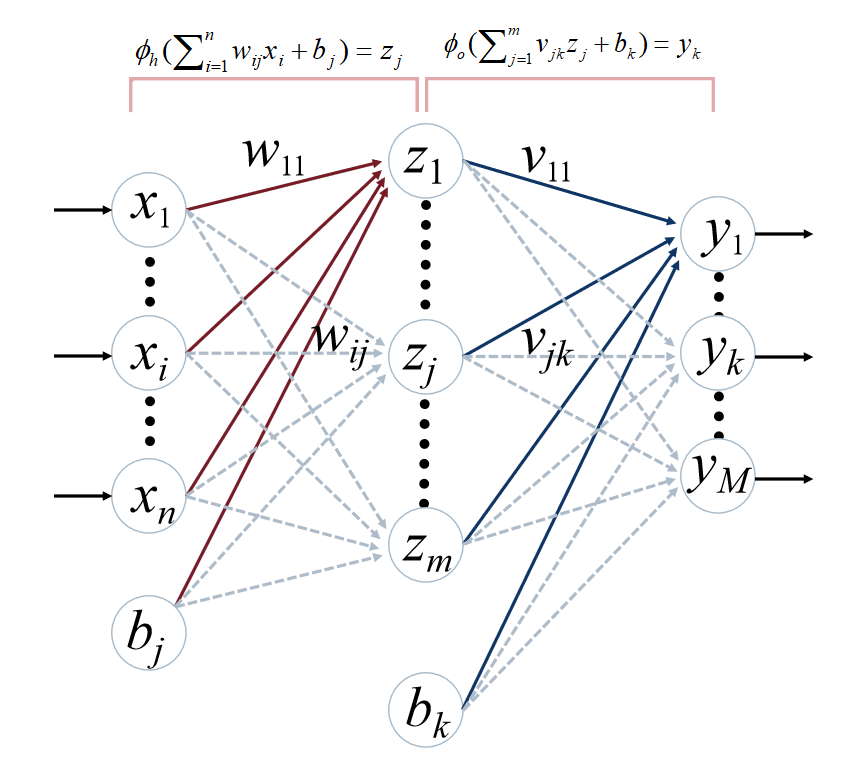

Untuk menghitung output neuron ke-j pada hidden layer, menggunakan formula berikut,

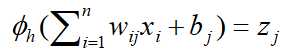

Untuk menghitung output neuron ke-k pada output layer, menggunakan formula berikut,

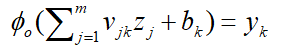

dimana,
- xᵢ merupakan neuron ke-i pada input layer
- zⱼ merupakan neuron ke-j pada hidden layer
- yₖ merupakan neuron ke-k pada output layer
- wᵢⱼ merupakan ‘weight’ untuk neuron ke-i pada input layer dan neuron ke-j pada hidden layer
- vⱼₖ merupakan ‘weight’ untuk neuron ke-j pada hidden layer dan neuron ke-k pada output layer
- bⱼ adalah bias untuk menghitung zⱼ
- bₖ adalah bias untuk menghitung yₖ
- ϕₕ adalah activation function pada hidden layer
- ϕₒ adalah activation function pada output layer

2. Loss Calculate

Pada bagian ini nilai ‘weight’ untuk tiap koneksi neuron akan diupdate sehingga output value mendekati target value. Jika pada Single Layer Perceptron kita menggunakan Delta Rule untuk mengevaluasi error, maka pada Multi Layer Perceptron kita akan menggunakan Backpropagation. Backpropagation menghitung gradien dari loss function untuk tiap ‘weight’
menggunakan chain rule yang dapat menghitung gradien satu layer pada satu waktu saat iterasi mundur dari layer terakhir untuk menghindari redundant calculation .

Pada regression analysis permasalahan seperti squared error dapat digunakan sebagai loss function, sedangkan untuk classification dapat menggunakan categorical crossentropy.
untuk sekarang kita akan gunakan squared error sebagai loss function. Squared error dapat disebut sebagai error function, ditulis dalam bentuk berikut,

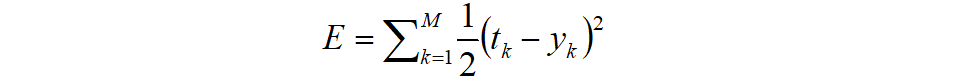

karena diatas kita sudah mendefinisikan yₖ, maka error function dapat ditulis menjadi,

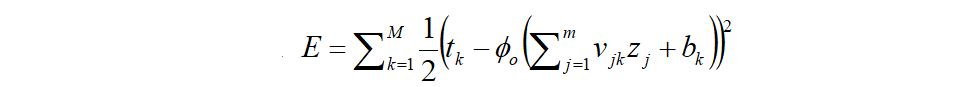

dimana,
- E = Error Function
- tₖ = Target value ke-k
- yₖ = Output value ke-k

3. Backward Pass
Pada tahap ini error yang didapat dari proses sebelumnya digunakan untuk mengoreksi ‘weight’ menggunakan backpropagation. Backpropagation akan menghitung gradien loss funtion untuk tiap weight yang digunakan pada output layer (vⱼₖ) begitu pula weight pada hidden layer (wᵢⱼ).

Syarat utama penggunaan backpropagation adalah activation function harus non-linear dan differentiable . Sehingga kita akan menggunakan Logistic/Sigmoid Function untuk keperluan ini.

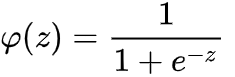

Turunan pertama dari logistic function adalah,

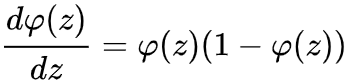

Besarnya perubahan pada weight dirumuskan sebagai berikut,

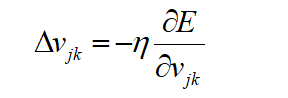

dimana,
- Δvⱼₖ = besarnya perubahan weight
- η = learning rate
- ∂ = turunan parsial,
- ∂E / ∂vⱼₖ = turunan parsial fungsi error E terhadap weight vⱼₖ


Kita akan coba terapkan Backpropagation untuk menghitung weight vⱼₖ (output layer) , langkah yang sama dapat dilakukan untuk weight wᵢ ⱼ (hidden layer). Turunan parsial fungsi Error E terhadap weight vⱼₖ dirumuskan sebagai berikut,

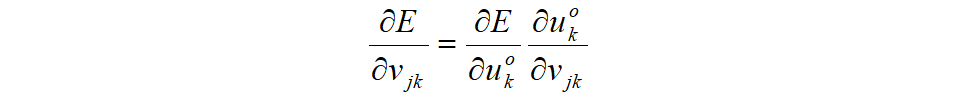

dimana uᵒₖ adalah,

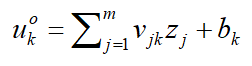

Sehingga ∂uᵒₖ / ∂vⱼₖ dapat dituliskan sebagai berikut,

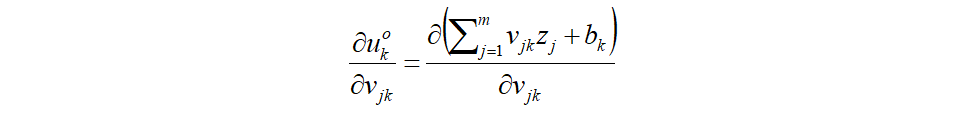

hasil turunan tersebut didapatkan,

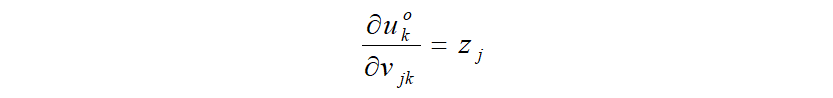

dan ∂E / ∂uᵒₖ dapat ditulis ulang menjadi,

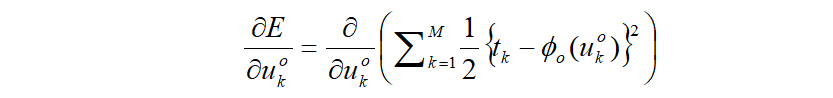

karena ϕₒ bergantung pada fungsi uᵒₖ dan ϕₒ adalah sigmoid/logistic funtion, maka hasil penurunan ∂E / ∂uᵒₖ akan mengikuti bentuk hasil penurunan fungsi logistic diatas,

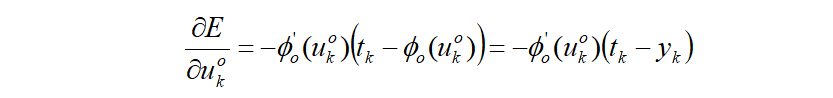

sehingga besarnya perubahan weight Δvⱼₖ dapat ditulis menjadi,

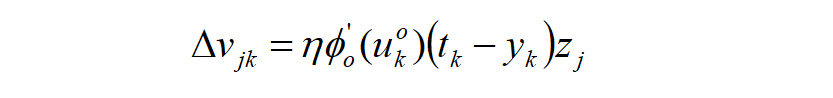

Besarnya weight baru dapat dituliskan sebagai berikut,

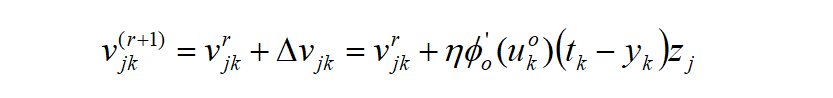

ϕₕ’ merupakan turunan fungsi aktivasi, inilah mengapa fungsi aktivasi harus bisa diturunkan (differentiable) jika menggunakan Backpropagation.

# Arsitektur & Algoritma MLP Timeseries
Arsitektur MLP yang akan digunakan sebagai berikut,

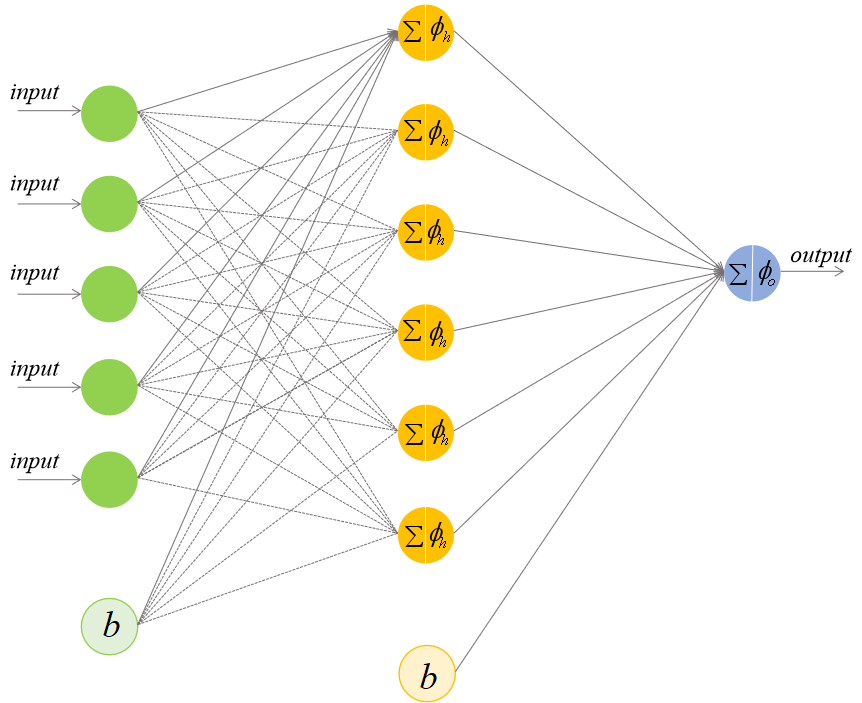

Untuk memembuat model yang dapat memprediksi gerak oscillator kita akan lakukan langkah-langkah berikut untuk proses training model,

- Define Dataset (array oscillator movement)
- Define parameter : 

b=0, w=0, v=0, η = 0.01, n=5, m=6, M=1

ϕₕ(x)= 1/(1 + exp(-x))= sigmoid funtion

ϕₒ(x)= x = linear function

TRAIN_ITER = 1000

LOOP until TRAIN_ITER == 1000 :

   - forward pass:
   
a. hidden layer -> itearsi 1 - n :
   
      z_pred = dot(x.w) + bⱼ
      
      f_sigmoid(z_pred)= 1/(1+ exp(z_pred))
      
b. output layer -> iterasi 1 - m :

      y_pred = dot(z.v) + bₖ
      
      f_linear(y_pred)= 1/(1+ exp(y_pred))
      
- loss calculation -> iterasi 1 - M:

      E_z = Σ1/2(t-z_activation)²
      
      E_y = Σ1/2(t-y_activation)²
      
- backward pass:

a. output layer -> iterasi 1 - m :
   
      ẟ_k = - f_sigmoid(y_pred)*(1-f_sigmoid(y_pred))*(tₖ - yₖ)
      
      v_new = v + (-η*ẟ_k*zⱼ)
      
      b_k_new = b_k + (-η.Σ.ẟ_k)
      
b. hidden layer -> itearsi 1 - n :

      ẟ_j = - f_linear(y_pred)*(1-f_linear(y_pred))*(Σv_new*ẟ_k)
      
      w_new = w + η*ẟ_j*xᵢ
      
      b_j_new = b_j + (-η.Σ.ẟ_j)

- pertama kita import library yang diperlukan dan menentukan banyaknya neuron pada tiap layer n jumlah neuron pada input layer, m jumlah neuron pada hidden layer, M jumlah neuron pada output layer, menentukan learning rate η = 0.01, dan banyaknya iterasi saat proses trainig,

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(suppress=True, precision=15)

#input sampling timeseries
n_sampling = 5

#define param
n = n_sampling
m = 6
M = 1
init_arr_item = 0.0

learning_rate = 0.001
TRAIN_ITER = 2000

- setelah itu kita persiapkan data pergerakan oscillator dari (-1, 1) dari waktu ke-1 sampai 500.

In [2]:
#ODE Critical Dumped
Critical_Dumped = np.array(
        [1.          ,  0.9980310417,  0.9921647546,  0.982472909 ,
        0.9690414108,  0.9519697845,  0.9313706249,  0.9073689737,
        0.8801016795,  0.849716714 ,  0.8163724522,  0.7802369177,
        0.7414870035,  0.7003076647,  0.6568910904,  0.6114358603,
        0.5641460809,  0.5152305196,  0.4649017207,  0.413375126 ,
        0.3608681911,  0.3075995058,  0.2537879208,  0.1996516846,
        0.1454075937,  0.0912701602,  0.03745079  , -0.0158429971,
       -0.0684083469, -0.1200477968, -0.1705699976, -0.2197903762,
       -0.2675317882, -0.3136251097, -0.357909813 , -0.4002344788,
       -0.4404572881, -0.4784464496, -0.514080601 , -0.5472491475,
       -0.5778525705, -0.6058026738, -0.631022786 , -0.6534479257,
       -0.6730249082, -0.6897124025, -0.7034809536, -0.7143129403,
       -0.7222025059, -0.7271554269, -0.7291889493, -0.7283315743,
       -0.7246228077, -0.7181128672, -0.7088623493, -0.6969418641,
       -0.6824316288, -0.6654210374, -0.6460081906, -0.6242994034,
       -0.600408684 , -0.5744571897, -0.5465726616, -0.5168888402,
       -0.4855448647, -0.4526846591, -0.4184563065, -0.3830114154,
       -0.3465044798, -0.3090922362, -0.2709330187, -0.2321861181,
       -0.1930111436, -0.1535673911, -0.1140132215, -0.0745054504,
       -0.0351987505,  0.003754929 ,  0.0422069253,  0.0800124039,
        0.1170308854,  0.1531267358,  0.1881696438,  0.2220350633,
        0.2546046337,  0.285766565 ,  0.3154159967,  0.3434553225,
        0.3697944836,  0.3943512278,  0.4170513356,  0.4378288112,
        0.4566260387,  0.473393905 ,  0.4880918848,  0.5006880942,
        0.5111593073,  0.5194909353,  0.5256769831,  0.5297199641,
        0.5316307794,  0.5314285699,  0.5291405445,  0.5248017686,
        0.5184549263,  0.5101500591,  0.4999442785,  0.4879014522,
        0.4740918675,  0.4585918763,  0.4414835191,  0.4228541313,
        0.4027959332,  0.381405608 ,  0.3587838644,  0.3350349905,
        0.3102664019,  0.2845881775,  0.2581125951,  0.2309536624,
        0.203226647 ,  0.1750476083,  0.1465329314,  0.1177988654,
        0.088961068 ,  0.0601341595,  0.0314312839,  0.0029636838,
       -0.0251597126, -0.0528326928, -0.0799521409, -0.1064184049,
       -0.1321356471, -0.1570121683, -0.180960722 , -0.203898798 ,
       -0.2257488868, -0.2464387264, -0.2659015144, -0.2840761068,
       -0.300907187 , -0.3163454067, -0.3303475111, -0.3428764278,
       -0.353901336 , -0.3633977138, -0.3713473487, -0.3777383362,
       -0.3825650461, -0.385828062 , -0.3875341099, -0.3876959473,
       -0.3863322415, -0.383467421 , -0.3791315077, -0.3733599292,
       -0.366193312 , -0.3576772569, -0.3478620974, -0.3368026429,
       -0.3245579066, -0.3111908228, -0.2967679536, -0.2813591698,
       -0.2650373477, -0.2478780387, -0.2299591432, -0.2113605708,
       -0.1921639049, -0.1724520582, -0.1523089317, -0.1318190728,
       -0.1110673334, -0.0901385351, -0.0691171352, -0.0480868979,
       -0.027130576 , -0.0063295973,  0.0142362391,  0.0344890553,
        0.054353177 ,  0.0737554036,  0.092625264 ,  0.1108952602,
        0.1285010962,  0.1453818881,  0.1614803636,  0.1767430396,
        0.1911203865,  0.2045669727,  0.217041592 ,  0.2285073731,
        0.2389318696,  0.248287133 ,  0.2565497656,  0.263700956 ,
        0.2697264957,  0.2746167771,  0.278366774 ,  0.2809760031,
        0.2824484705,  0.2827926011,  0.2820211462,  0.2801510816,
        0.2772034898,  0.2732034233,  0.2681797564,  0.2621650261,
        0.2551952569,  0.2473097757,  0.2385510165,  0.2289643145,
        0.2185976919,  0.2075016354,  0.1957288669,  0.1833341082,
        0.170373842 ,  0.1569060669,  0.142990051 ,  0.1286860826,
        0.1140552212,  0.0991590476,  0.0840594155,  0.0688182049,
        0.0534970785,  0.0381572423,  0.0228592109,  0.007662578 ,
       -0.0073742059, -0.0221940493, -0.0367414269, -0.0509625778,
       -0.0648056959, -0.0782211079, -0.0911614408, -0.1035817819,
       -0.1154398237, -0.1266959966, -0.1373135908, -0.1472588648,
       -0.1565011412, -0.1650128885, -0.1727697898, -0.1797507988,
       -0.1859381815, -0.1913175438, -0.1958778467, -0.1996114081,
       -0.2025138908, -0.2045842776, -0.2058248338, -0.2062410574,
       -0.2058416172, -0.2046382789, -0.2026458198, -0.1998819339,
       -0.1963671254, -0.1921245929, -0.1871801048, -0.1815618663,
       -0.175300377 , -0.1684282831, -0.1609802227, -0.1529926637,
       -0.1445037384, -0.1355530732, -0.1261816128, -0.116431444 ,
       -0.106345616 , -0.0959679586, -0.0853429004, -0.0745152871,
       -0.0635301997, -0.0524327745, -0.0412680249, -0.0300806666,
       -0.0189149448, -0.0078144669,  0.0031779612,  0.0140204939,
        0.0246723963,  0.0350941945,  0.0452478088,  0.0550966927,
        0.0646059513,  0.0737424623,  0.0824749815,  0.0907742425,
        0.0986130483,  0.10596635  ,  0.1128113212,  0.1191274169,
        0.1248964282,  0.130102524 ,  0.134732282 ,  0.138774712 ,
        0.1422212717,  0.1450658644,  0.1473048372,  0.1489369619,
        0.14996341  ,  0.1503877196,  0.1502157497,  0.1494556301,
        0.1481176996,  0.1462144384,  0.1437603927,  0.1407720908,
        0.1372679543,  0.1332682011,  0.1287947441,  0.1238710843,
        0.1185221976,  0.1127744187,  0.1066553209,  0.1001935917,
        0.0934189066,  0.0863618   ,  0.0790535344,  0.0715259684,
        0.0638114241,  0.0559425546,  0.0479522111,  0.0398733115,
        0.0317387102,  0.02358107  ,  0.0154327358,  0.0073256115,
       -0.0007089597, -0.0086403112, -0.0164385659, -0.0240747428,
       -0.03152086  , -0.0387500326, -0.045736564 , -0.0524560316,
       -0.0588853717, -0.0650029439, -0.0707886042, -0.0762237665,
       -0.0812914533, -0.0859763438, -0.090264813 , -0.0941449641,
       -0.0976066533, -0.1006415081, -0.103242938 , -0.1054061382,
       -0.1071280858, -0.10840753  , -0.1092449743, -0.1096426528,
       -0.1096045001, -0.1091361138, -0.1082447128, -0.1069390876,
       -0.1052295468, -0.1031278572, -0.10064718  , -0.0978020006,
       -0.0946080561, -0.0910822573, -0.0872426079, -0.0831081189,
       -0.0786987231, -0.0740351851, -0.0691390074, -0.0640323387,
       -0.0587378778, -0.0532787776, -0.0476785487, -0.0419609622,
       -0.0361499534, -0.0302695255, -0.0243436544, -0.018396195 ,
       -0.0124507886, -0.0065307732, -0.0006590951,  0.005141776 ,
        0.0108499298,  0.0164440939,  0.0219037101,  0.0272090056,
        0.0323410614,  0.0372818758,  0.0420144233,  0.0465227101,
        0.0507918233,  0.0548079763,  0.0585585491,  0.0620321226,
        0.0652185097,  0.0681087792,  0.0706952745,  0.0729716282,
        0.0749327723,  0.0765749401,  0.0778956655,  0.0788937769,
        0.0795693843,  0.0799238645,  0.0799598385,  0.0796811464,
        0.0790928169,  0.0782010321,  0.0770130899,  0.0755373606,
        0.0737832405,  0.0717611029,  0.0694822443,  0.0669588288,
        0.0642038298,  0.0612309683,  0.0580546502,  0.0546899004,
        0.0511522969,  0.0474579019,  0.0436231932,  0.0396649939,
        0.0356004021,  0.0314467203,  0.027221385 ,  0.022941896 ,
        0.0186257473,  0.0142903576,  0.0099530044,  0.0056307567,
        0.0013404111, -0.0029015722, -0.0070791277, -0.0111766445,
       -0.0151790209, -0.0190717184, -0.0228408107, -0.0264730319,
       -0.0299558191, -0.0332773543, -0.0364266004, -0.0393933355,
       -0.0421681827, -0.0447426365, -0.047109085 , -0.0492608291,
       -0.0511920967, -0.052898055 , -0.054374816 , -0.0556194419,
       -0.0566299432, -0.0574052756, -0.057945332 , -0.0582509311,
       -0.0583238027, -0.0581665697, -0.0577827263, -0.0571766134,
       -0.0563533913, -0.0553190083, -0.0540801698, -0.0526442991,
       -0.0510195019, -0.049214525 , -0.0472387132, -0.0451019667,
       -0.0428146937, -0.0403877641, -0.0378324608, -0.0351604295,
       -0.0323836303, -0.0295142859, -0.0265648271, -0.023547844 ,
       -0.0204760385, -0.0173621676, -0.0142189926, -0.0110592314,
       -0.0078955086, -0.0047403063, -0.0016059165,  0.0014956037,
        0.0045524771,  0.0075532493,  0.0104868296,  0.0133425297,
        0.0161101011,  0.0187797696,  0.0213422689,  0.0237888679,
        0.0261114018,  0.028302294 ,  0.030354581 ,  0.0322619304,
        0.0340186586,  0.0356197452,  0.0370608438,  0.0383382913,
        0.0394491134,  0.0403910279,  0.0411624445,  0.0417624633], np.float32)

- Selanjutnya kita split data Critical_Dumped diatas menggunakan fungsi berikut,

In [3]:
def split_sequence(sequence, n_steps):
	_X, _y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		_X.append(seq_x)
		_y.append(seq_y)
	return np.array(_X), np.array(_y)

#split data ODE Critical Dumped
x, y = split_sequence(Critical_Dumped, n_sampling)

hasil split diatas akan menghasilkan pasangan data (x, y) dengan size x=[495,5] dan size y = [495,1],

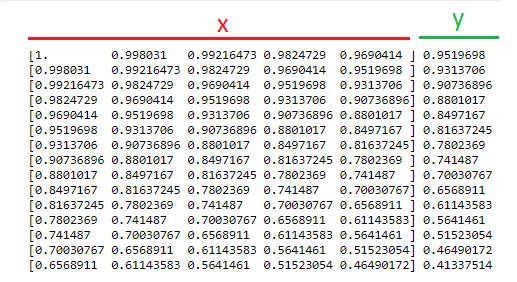

fungsi split diatas akan membagi tiap 5 data berurutan pada Critical_Damped array sebagai x[i] dan data ke 6 sebagai y[i], ilustrasinya sebagai berikut,

data input :

[1 2 3 4 5 6 7 8 9 dst... ]

hasil split :

|---- x ----| y |

| 1 2 3 4 5 | 6 |

| 2 3 4 5 6 | 7 |

| 3 4 5 6 7 | 8 |

| 4 5 6 7 8 | 9 |

| dst ... |

- setelah itu kita inisialisasi parameter w dengan size [6, 5], v dengan size [1, 6], b_j sengan size [6], b_k dengan size [1], z_pred dengan size [495,6], y_pred, dengan size [495, 1], E dengan size [1], v_new dengan size [1,6], delta_k dengan size [1], w_new dengan size [6,5] dan delta_j dengan size [1].

In [4]:
w = np.ones([m,n], np.float32)*init_arr_item
v = np.ones([M,m], np.float32)*init_arr_item
b_j = np.zeros([m], np.float32)*init_arr_item
b_k = np.zeros([M], np.float32)*init_arr_item

z_pred = np.zeros([y.shape[0], m], np.float32)
y_pred = np.zeros([y.shape[0], M], np.float32)
E = np.zeros(M, np.float32)

v_new = np.zeros([M,m], np.float32)
delta_k = np.zeros(M, np.float32)

w_new = np.zeros([m,n], np.float32)
delta_j = np.zeros(m, np.float32)

- selanjutnya kita definisikan activation function pada MLP. Neuron pada hidden layer kita gunakan sigmoid activation function dan untuk neuron pada output layer gunakan linear activation function.

In [5]:
#define sigmoid activation function
def f_sigmoid(value):
    return 1.0/(1.0+np.exp(-value))

def f_sigmoid_derivation(value):
    return f_sigmoid(value)*(1-f_sigmoid(value))
  
#define linear activation function
def f_linear(value):
    return value

def f_linear_derivation(value):
    return np.ones(value.shape, np.float32)
  
  

#hidden layer activation function wrapper
def f_activation(value):
    return f_sigmoid(value)
  
def f_activation_derivation(value):
    return f_sigmoid_derivation(value)

#output layer activation function wrapper
def f_activation_output(value):
    return f_linear(value)

def f_activation_derivation_output(value):
    return f_linear_derivation(value)

- setelah itu kita akan lakukan proses feedforward dari layer input ke hidden layer dan dilanjutkan dengan feedforward dari hidden layer ke output layer,

In [6]:
def calc_z_j(x_train, w_train, b_j_train):
    for j in range(m):
        z_pred[:,j] = np.dot(x_train,w_train[j,:]) + b_j_train[j]
    
    return z_pred
    
def calc_y_k(z_train, v_train, b_k_train):
    for k in range(M):
        y_pred[:,k] = np.dot(z_train, v_train[k,:]) + b_k_train[k]
    
    return y_pred

- setelah melakukan proses feedforward diatas, selanjutnya kita calculate loss dengan menghitung squared error yang telah dibahas ditulisan sebelumnya,


In [7]:
def error_calc(target, output):
    for k in range(M):
        E[k] = 0.5*(target[k] - output[k])**2
    return np.sum(E)

- setelah itu kita lakukan proses backpropagation dari output layer menuju hidden layer, dan dilanjutkan backpropagation dari hidden layer menuju input layer sehingga didapatkan nilai w , v , b_j dan b_k baru.


In [8]:
def calc_v_new(v_last, y, y_prediction, z_prediction):
    delta_k = np.transpose(f_activation_derivation_output(y_prediction)*(np.reshape(y, (y.shape[0], 1)) - y_prediction))
        
    for j in range(m):
        v_new[:,j] = v_last[:,j] + learning_rate*np.dot(delta_k,z_prediction[:,j])
            
    return v_new, delta_k


def calc_w_new(w_last, v_new, delta_k, z_prediction, x_input):
    sum_v = np.dot(np.transpose(v_new), delta_k)
    
    delta_j = np.transpose(f_activation_derivation(z_prediction))*sum_v
    
    for i in range(n):
            w_new[:,i] = w_last[:,i] + learning_rate*np.dot(delta_j,x_input[:,i])
            
    return w_new, delta_j
    
 
def calc_b_k_new(delta_k, b_k_last):
    return b_k_last +  learning_rate*np.sum(delta_k)

def calc_b_j_new(delta_j, b_j_last):
    return b_j_last + learning_rate*np.sum(delta_j)

- selanjutnya kita wrap semua function diatas menjadi satu, didalamnya kita akan lakukan iterasi training data sebanyak TRAIN_ITER ,

In [9]:
def train_model(train_count, w_train, v_train, b_j_train, b_k_train, y_train, x_train):
    for l in range(train_count):
        z_prediction = calc_z_j(x_train, w_train, b_j_train)
        z_prediction = f_activation(z_prediction)
        
        y_prediction = calc_y_k(z_prediction, v_train, b_k_train)
        y_prediction = f_activation_output(y_prediction)
        
        v_train, delta_k = calc_v_new(v_train, y_train, y_prediction, z_prediction)
        w_train, delta_j = calc_w_new(w_train, v_train, delta_k, z_prediction, x_train)
        
        b_k_train = calc_b_k_new(delta_k, b_k_train)
        b_j_train = calc_b_j_new(delta_j, b_j_train)
        
        print("Iterasi ke-" + str(l) + " Error : " + str(error_calc(y_train, y_prediction)))
        
    return v_train, w_train, b_k_train, b_j_train

- jalankan perintah berikut untuk memulai proses training model,

In [10]:
v, w, b_k, b_j = train_model(TRAIN_ITER, w, v, b_j, b_k, y, x)

Iterasi ke-0 Error : 0.45312324
Iterasi ke-1 Error : 0.45670885
Iterasi ke-2 Error : 0.45585686
Iterasi ke-3 Error : 0.45605978
Iterasi ke-4 Error : 0.4560123
Iterasi ke-5 Error : 0.45602426
Iterasi ke-6 Error : 0.4560221
Iterasi ke-7 Error : 0.4560233
Iterasi ke-8 Error : 0.45602375
Iterasi ke-9 Error : 0.45602432
Iterasi ke-10 Error : 0.4560249
Iterasi ke-11 Error : 0.45602545
Iterasi ke-12 Error : 0.45602602
Iterasi ke-13 Error : 0.45602655
Iterasi ke-14 Error : 0.45602712
Iterasi ke-15 Error : 0.4560277
Iterasi ke-16 Error : 0.45602825
Iterasi ke-17 Error : 0.45602882
Iterasi ke-18 Error : 0.4560294
Iterasi ke-19 Error : 0.45602995
Iterasi ke-20 Error : 0.45603052
Iterasi ke-21 Error : 0.45603108
Iterasi ke-22 Error : 0.4560317
Iterasi ke-23 Error : 0.4560323
Iterasi ke-24 Error : 0.45603287
Iterasi ke-25 Error : 0.45603344
Iterasi ke-26 Error : 0.45603406
Iterasi ke-27 Error : 0.45603463
Iterasi ke-28 Error : 0.4560352
Iterasi ke-29 Error : 0.45603576
Iterasi ke-30 Error : 0.45603

Iterasi ke-445 Error : 0.4201097
Iterasi ke-446 Error : 0.41914427
Iterasi ke-447 Error : 0.418156
Iterasi ke-448 Error : 0.41714445
Iterasi ke-449 Error : 0.41610926
Iterasi ke-450 Error : 0.41504994
Iterasi ke-451 Error : 0.41396612
Iterasi ke-452 Error : 0.41285732
Iterasi ke-453 Error : 0.41172308
Iterasi ke-454 Error : 0.41056308
Iterasi ke-455 Error : 0.4093767
Iterasi ke-456 Error : 0.40816364
Iterasi ke-457 Error : 0.40692347
Iterasi ke-458 Error : 0.40565568
Iterasi ke-459 Error : 0.40435988
Iterasi ke-460 Error : 0.40303567
Iterasi ke-461 Error : 0.40168253
Iterasi ke-462 Error : 0.4003001
Iterasi ke-463 Error : 0.39888793
Iterasi ke-464 Error : 0.39744574
Iterasi ke-465 Error : 0.39597297
Iterasi ke-466 Error : 0.39446914
Iterasi ke-467 Error : 0.39293408
Iterasi ke-468 Error : 0.39136735
Iterasi ke-469 Error : 0.38976842
Iterasi ke-470 Error : 0.38813704
Iterasi ke-471 Error : 0.38647282
Iterasi ke-472 Error : 0.38477543
Iterasi ke-473 Error : 0.3830445
Iterasi ke-474 Error

Iterasi ke-914 Error : 0.018160926
Iterasi ke-915 Error : 0.018160768
Iterasi ke-916 Error : 0.01816061
Iterasi ke-917 Error : 0.018160472
Iterasi ke-918 Error : 0.018160336
Iterasi ke-919 Error : 0.018160222
Iterasi ke-920 Error : 0.018160064
Iterasi ke-921 Error : 0.018159961
Iterasi ke-922 Error : 0.018159814
Iterasi ke-923 Error : 0.018159723
Iterasi ke-924 Error : 0.018159587
Iterasi ke-925 Error : 0.018159496
Iterasi ke-926 Error : 0.01815937
Iterasi ke-927 Error : 0.01815929
Iterasi ke-928 Error : 0.018159166
Iterasi ke-929 Error : 0.018159086
Iterasi ke-930 Error : 0.018158996
Iterasi ke-931 Error : 0.018158905
Iterasi ke-932 Error : 0.018158814
Iterasi ke-933 Error : 0.018158745
Iterasi ke-934 Error : 0.018158656
Iterasi ke-935 Error : 0.018158564
Iterasi ke-936 Error : 0.018158484
Iterasi ke-937 Error : 0.018158417
Iterasi ke-938 Error : 0.01815836
Iterasi ke-939 Error : 0.01815829
Iterasi ke-940 Error : 0.018158212
Iterasi ke-941 Error : 0.018158155
Iterasi ke-942 Error : 0.

Iterasi ke-1407 Error : 0.018149013
Iterasi ke-1408 Error : 0.018148955
Iterasi ke-1409 Error : 0.018148888
Iterasi ke-1410 Error : 0.018148841
Iterasi ke-1411 Error : 0.018148774
Iterasi ke-1412 Error : 0.018148728
Iterasi ke-1413 Error : 0.018148683
Iterasi ke-1414 Error : 0.018148616
Iterasi ke-1415 Error : 0.018148558
Iterasi ke-1416 Error : 0.018148502
Iterasi ke-1417 Error : 0.018148456
Iterasi ke-1418 Error : 0.018148376
Iterasi ke-1419 Error : 0.018148342
Iterasi ke-1420 Error : 0.018148275
Iterasi ke-1421 Error : 0.018148206
Iterasi ke-1422 Error : 0.018148137
Iterasi ke-1423 Error : 0.018148081
Iterasi ke-1424 Error : 0.018148037
Iterasi ke-1425 Error : 0.018147968
Iterasi ke-1426 Error : 0.018147888
Iterasi ke-1427 Error : 0.018147854
Iterasi ke-1428 Error : 0.018147774
Iterasi ke-1429 Error : 0.01814773
Iterasi ke-1430 Error : 0.01814766
Iterasi ke-1431 Error : 0.018147593
Iterasi ke-1432 Error : 0.018147524
Iterasi ke-1433 Error : 0.018147469
Iterasi ke-1434 Error : 0.0181

Iterasi ke-1891 Error : 0.018100929
Iterasi ke-1892 Error : 0.018100793
Iterasi ke-1893 Error : 0.018100634
Iterasi ke-1894 Error : 0.018100498
Iterasi ke-1895 Error : 0.018100362
Iterasi ke-1896 Error : 0.018100215
Iterasi ke-1897 Error : 0.01810008
Iterasi ke-1898 Error : 0.018099943
Iterasi ke-1899 Error : 0.018099807
Iterasi ke-1900 Error : 0.01809966
Iterasi ke-1901 Error : 0.0180995
Iterasi ke-1902 Error : 0.018099386
Iterasi ke-1903 Error : 0.018099228
Iterasi ke-1904 Error : 0.01809908
Iterasi ke-1905 Error : 0.018098934
Iterasi ke-1906 Error : 0.018098798
Iterasi ke-1907 Error : 0.01809865
Iterasi ke-1908 Error : 0.018098503
Iterasi ke-1909 Error : 0.018098367
Iterasi ke-1910 Error : 0.01809823
Iterasi ke-1911 Error : 0.018098071
Iterasi ke-1912 Error : 0.018097913
Iterasi ke-1913 Error : 0.018097788
Iterasi ke-1914 Error : 0.018097641
Iterasi ke-1915 Error : 0.018097483
Iterasi ke-1916 Error : 0.018097335
Iterasi ke-1917 Error : 0.018097186
Iterasi ke-1918 Error : 0.01809704


tunggu sampai proses training selesai,
- lanjutkan dengan cek nilai w , v , b_j dan b_k baru,

In [11]:
print(v, w, b_j, b_k)

[[-0.44284868 -0.44284868 -0.44284868 -0.44284868 -0.44284868 -0.44284868]] [[-0.20206024 -0.26268896 -0.32152662 -0.37836543 -0.43300664]
 [-0.20206024 -0.26268896 -0.32152662 -0.37836543 -0.43300664]
 [-0.20206024 -0.26268896 -0.32152662 -0.37836543 -0.43300664]
 [-0.20206024 -0.26268896 -0.32152662 -0.37836543 -0.43300664]
 [-0.20206024 -0.26268896 -0.32152662 -0.37836543 -0.43300664]
 [-0.20206024 -0.26268896 -0.32152662 -0.37836543 -0.43300664]] [-0.36220562 -0.36220562 -0.36220562 -0.36220562 -0.36220562 -0.36220562] [1.0965872]


ditahap ini kita telah selesai melakukan proses training data, dihasilkan nilai w , v , b_j dan b_k baru yang selanjutnya akan kita gunakan di proses testing.

# Model Testing

- Selanjutnya kita akan melakukan proses testing model dengan menggunakan nilai w , v , b_j dan b_k baru.

In [12]:
def test(x_test, w, v,  b_j, b_k):
    z_prediction = np.dot(x_test, np.transpose(w)) + b_j
    f_z_prediction = f_activation(z_prediction)
    
    y_prediction = np.dot(f_z_prediction, np.transpose(v)) + b_k
    f_y_prediction =  f_activation_output(y_prediction)
    
    return f_y_prediction

y_prediction_test = np.zeros(len(x), np.float32)
y_prediction_test = test(x, w, v,  b_j, b_k)

y_prediction_test merupakan array dengan size (495, 1) hasil prediksi model dengan nilai w , v , b_j dan b_k baru.

- setelah itu kita plot data hasil prediksi y_prediction_test dengan data target y , wrap kedua array tersebut menjadi dataframe pandas dan lakukan plot terhadap dataframe yang dibuat.

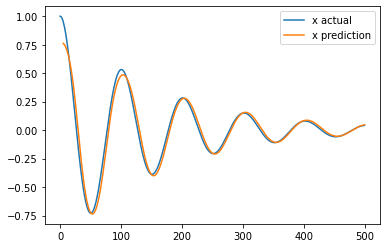

In [13]:
t = np.linspace(1, 500, 500)

ODE_Target = np.transpose(np.array([t, Critical_Dumped], np.float32))
ODE_Output = np.transpose(np.array([t[n_sampling:], y_prediction_test[:,0]], np.float32))

ODE_Target_PD =  pd.DataFrame(data=ODE_Target[:,:],   
              index=ODE_Target[:,0],    
              columns=['t', 'x actual'])  

ODE_Output_PD = pd.DataFrame(data=ODE_Output[:,:],   
              index=ODE_Output[:,0],    
              columns=['t', 'x prediction'])  

ODE_PD = pd.merge(ODE_Target_PD, ODE_Output_PD, on='t', how='left')

ODE_PD[['x actual','x prediction']].plot()

dari plot diatas terlihat data hasil prediksi y_prediction_test menghasilkan plot grafik yang mirip dengan data aktual y dengan nilai squared error 0.018. Sehingga Multi Layer Perceptron Backpropagation bisa digunakan untuk prediksi data time series yang pada kasus ini memprediksi pola gerakan harmonic oscillator.

sumber : 
https://machinelearning.mipa.ugm.ac.id/2018/05/24/artificial-neural-network-ann/

https://medium.com/@yunusmuhammad007/9-artificial-neural-network-ann-part-3-mlp-backpropagation-timeseries-forecasting-e807025a9a33

https://medium.com/@yunusmuhammad007/8-artificial-neural-network-ann-part-3-teori-dasar-multi-layer-perceptron-backpropagation-8acf20bbd60a

https://machinelearningmastery.com/exploratory-configuration-multilayer-perceptron-network-time-series-forecasting/

https://en.wikipedia.org/wiki/Multilayer_perceptron

https://www.slideshare.net/SungJuKim2/multi-layer-perceptron-back-propagation

https://medium.com/@AI_with_Kain/understanding-of-multilayer-perceptron-mlp-8f179c4a135f

https://en.wikipedia.org/wiki/Backpropagation

Haykin. S. 2009. Neural Networks and Learning Machines. United State of America: Pearson.

Kriesel, David. 2005. A Brief Introduction to Neural Network.Germany